In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("../data/raw/Electric_Consumption_And_Cost__2010_-_Feb_2023__20240417.csv")

C:\Users\Goga\AppData\Local\Temp\ipykernel_18336\76458044.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/Electric_Consumption_And_Cost__2010_-_Feb_2023__20240417.csv")


In [22]:
df.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800.0,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200.0,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200.0,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600.0,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600.0,5598.34,216.0,2808.0,5323.20


In [23]:
df.dtypes

Development Name       object
Borough                object
Account Name           object
Location               object
Meter AMR              object
Meter Scope            object
TDS #                 float64
EDP                     int64
RC Code                object
Funding Source         object
AMP #                  object
Vendor Name            object
UMIS BILL ID            int64
Revenue Month          object
Service Start Date     object
Service End Date       object
# days                float64
Meter Number           object
Estimated              object
Current Charges       float64
Rate Class             object
Bill Analyzed          object
Consumption (KWH)     float64
KWH Charges           float64
Consumption (KW)      float64
KW Charges            float64
Other charges         float64
dtype: object

In [24]:
df.shape

(447849, 27)

In [25]:
df.describe()

,TDS #,EDP,UMIS BILL ID,# days,Current Charges,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
count,445111.000000,447849.000000,4.478490e+05,447841.000000,4.478490e+05,4.478490e+05,4.478490e+05,447849.000000,447849.000000,4.478490e+05
mean,117.512099,425.015438,6.355232e+06,30.447960,4.277735e+03,3.115645e+04,1.431691e+03,63.944056,903.329622,1.942714e+03
std,128.881800,186.965308,3.209486e+06,1.898483,8.071365e+03,4.896050e+04,3.468343e+03,627.156668,1567.021090,4.679456e+03
min,1.000000,63.000000,1.726303e+06,1.000000,-1.068744e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,-5.939643e+04
25%,33.000000,225.000000,3.543961e+06,29.000000,6.275200e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,64.000000,426.000000,5.658874e+06,30.000000,2.313950e+03,1.340000e+04,5.664600e+02,23.940000,288.050000,9.768900e+02
75%,150.000000,555.000000,9.282883e+06,32.000000,5.606110e+03,4.608000e+04,2.034260e+03,90.340000,1323.160000,2.822310e+03
max,582.000000,999.000000,1.224390e+07,396.000000,3.551569e+06,1.779600e+06,1.652807e+06,329074.000000,137814.280000,1.898762e+06


In [26]:
Borough_counts = df.value_counts("Borough")
Borough_counts

Borough
BROOKLYN                    171058
MANHATTAN                   114855
BRONX                       102300
QUEENS                       51791
STATEN ISLAND                 3422
NON DEVELOPMENT FACILITY      2738
FHA                           1685
Name: count, dtype: int64

<Axes: xlabel='Borough'>

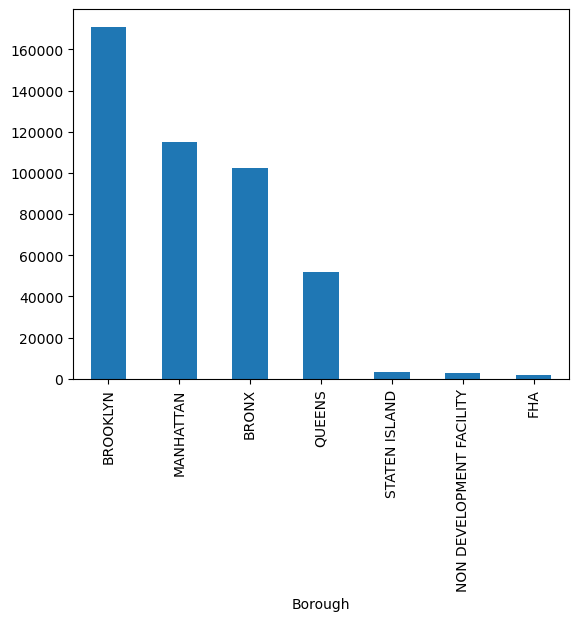

In [27]:
Borough_counts.plot.bar()

In [28]:
#Grouping energy consumption by borough
Borough_Consumption = df.groupby("Borough")["Consumption (KWH)"].sum()

Borough_Consumption

Borough
BRONX                       3.635073e+09
BROOKLYN                    4.433873e+09
FHA                         2.656790e+05
MANHATTAN                   4.042236e+09
NON DEVELOPMENT FACILITY    2.141700e+08
QUEENS                      1.235082e+09
STATEN ISLAND               3.926863e+08
Name: Consumption (KWH), dtype: float64

<Axes: xlabel='Borough'>

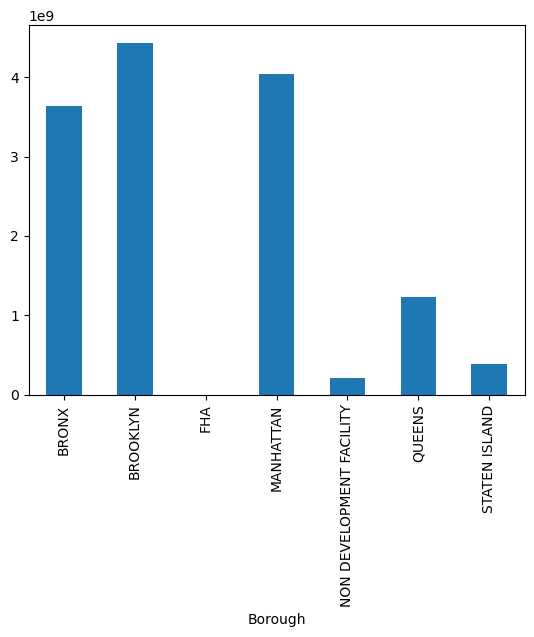

In [29]:
Borough_Consumption.plot.bar()

## We can observe that in New York City, the borough of Brooklyn has the largest energy consumption. The borough with the least consumption is staten island. This is supported by the fact that Brooklyn is the largest borough with a population of 2.68 million and staten island is the least populated borough with a population of less than 500,000

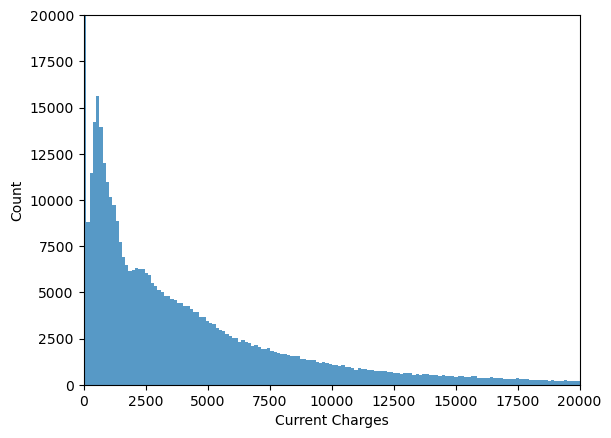

In [49]:
sns.histplot(df["Current Charges"])

plt.ylim(0, 20000)
plt.xlim(0,20000)
plt.show()

In [42]:
df["Current Charges"]

0         15396.82
1         14556.34
2         13904.98
3         14764.04
4         13729.54
            ...   
447844     3342.30
447845     3755.58
447846     9092.54
447847     9927.14
447848    10805.65
Name: Current Charges, Length: 447849, dtype: float64

In [50]:
df["Current Charges"].max()

3551569.45

In [52]:
df["Current Charges"].count()

447849

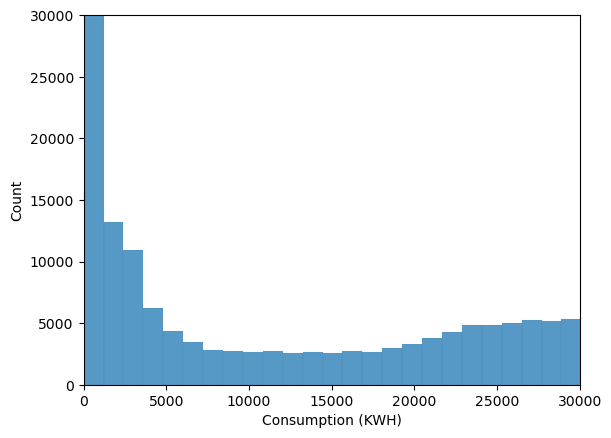

In [60]:
sns.histplot(df["Consumption (KWH)"])

plt.xlim(0, 30000)
plt.ylim(0,30000)
plt.show()

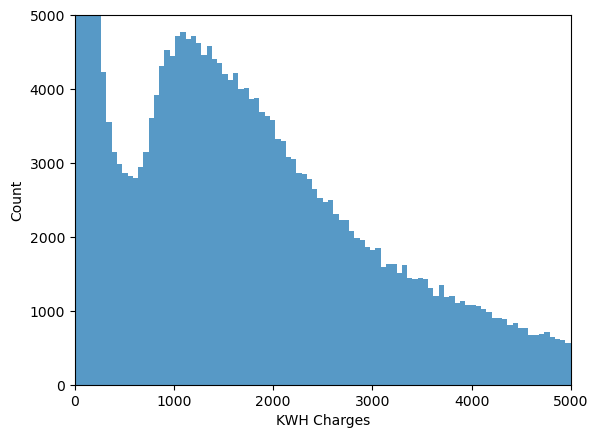

In [72]:
sns.histplot(df["KWH Charges"])

plt.xlim(0, 5000)
plt.ylim(0,5000)
plt.show()



#Consumption (KW)      float64
#KW Charges            float64
#Other charges         float64

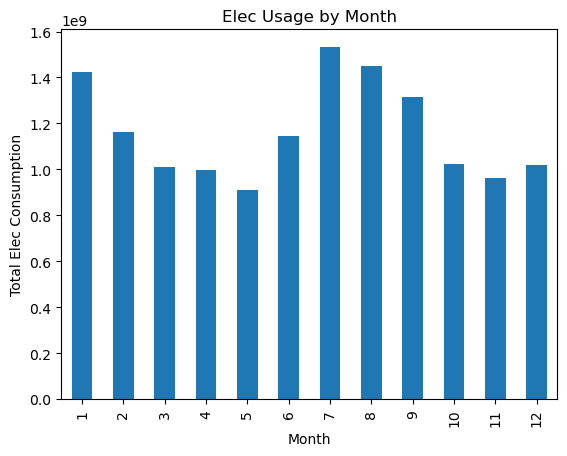

In [73]:
#Converting revenue month to datetime so i can extract the month and analyze which months the most elec is being used
#My Hypothesis is that the most electricity would have been used in the summer months

df["Revenue Month"] = pd.to_datetime(df["Revenue Month"])

#Extracting the month column
df["Month"] = df["Revenue Month"].dt.month

#Grouping the data by month
#Finding the total elec consumption
Monthly_Con = df.groupby("Month")["Consumption (KWH)"].sum()

Monthly_Con.plot(kind = "bar" , xlabel = "Month" , ylabel ="Total Elec Consumption" , title = "Elec Usage by Month")

plt.show()

In [81]:
Monthly_Con.sort_values(ascending=False)

Month
7     1.532865e+09
8     1.451030e+09
1     1.422522e+09
9     1.313762e+09
2     1.164292e+09
6     1.147066e+09
10    1.021310e+09
12    1.020112e+09
3     1.008436e+09
4     9.992609e+08
11    9.608704e+08
5     9.118613e+08
Name: Consumption (KWH), dtype: float64

## The data shows us that the top 3 months for electricity consumption are July, August and January. This supports our hypothesis that the most electricity usage occurs during summer but I was surprised to learn that the 3rd most electricity usage occurs during January

Since our dataset focuses on NYCHA facilities, I wanted to analyze the electricity consumption by the type of funding source for the development.

Because most of the developments are federally funded, my hypothesis is that the most electricity consumption is by federally funded NYCHA developments 

In [75]:
df["Funding Source"].unique()

array(['FEDERAL', 'MIXED FINANCE/LLC1', 'MIXED FINANCE/LLC2',
       'FEDERAL-COOP', 'NON-DEVELOPMENT', 'Non-Development', 'SECTION 8',
       'MIXED/FINANCE/LLC2'], dtype=object)

In [76]:
#Grouping energy consumption by funding source
Fund_Source_Cons = df.groupby("Funding Source")["Consumption (KWH)"].sum()

Fund_Source_Cons

Funding Source
FEDERAL               1.207404e+10
FEDERAL-COOP          2.366892e+07
MIXED FINANCE/LLC1    1.145316e+09
MIXED FINANCE/LLC2    4.842074e+08
MIXED/FINANCE/LLC2    0.000000e+00
NON-DEVELOPMENT       2.113752e+08
Non-Development       2.794840e+06
SECTION 8             1.198797e+07
Name: Consumption (KWH), dtype: float64

<Axes: xlabel='Funding Source'>

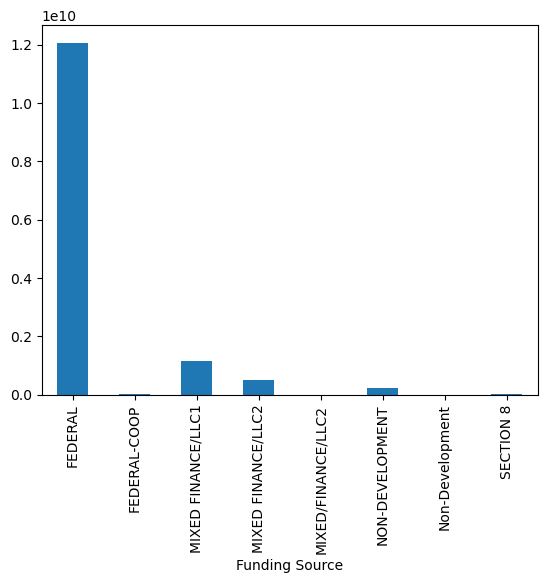

In [77]:
Fund_Source_Cons.plot.bar()

In [80]:
Fund_Source_Cons.sort_values(ascending=False)

Funding Source
FEDERAL               1.207404e+10
MIXED FINANCE/LLC1    1.145316e+09
MIXED FINANCE/LLC2    4.842074e+08
NON-DEVELOPMENT       2.113752e+08
FEDERAL-COOP          2.366892e+07
SECTION 8             1.198797e+07
Non-Development       2.794840e+06
MIXED/FINANCE/LLC2    0.000000e+00
Name: Consumption (KWH), dtype: float64

## We can observe that the funding source that utilizes the most electricity is Federally funded developments. This proves my hypothesis correct. I was surprised to learn that Section 8 housing accounts for the 2nd to last in terms of electricity consumption. I assumed it would be larger because of the vast number of section 8 housing vouchers used in the city, 85,000

## What we learned from the EDA?
* The most electricity is used in Brooklyn which is supported by Brooklyn being the most populated borough
* The least is used in Staten Island, which makes sense due to the smaller population
* The months with the most electricity consumption are July and August, followed by January
* NYCHA Developments that are federally funded use the most electricity while Section 8 housing and non residential use the least